# On the problems of AAV co-transduction:

In [2]:
import numpy as np
import seaborn as sns
from scipy.stats import poisson
import matplotlib.pyplot as plt

Here is a simple simulation infecting a bunch of cells (n_cells) with some AAV particles. I will set a detection limit above which we will observe the presence of the AAV (using whatever given method you are using to detect expression).

Some cells will get more AAV particles than others and I am representing this variability by drawing virion counts from a Poisson distribution with mean count = lambda... it has been published that ~20 is an appropriate lambda value for in vivo neurons (i.e. mean number of virions per cell)(in a lovely little paper by Maturana et al, Gene Therapy, 2021), but its absolute value is less important than its relationship to the detection limit. 

In [3]:
# set the number of cells to simulate
n_cells = 100000

# set the lambda values for each virus (20 has been reported from here but the absolute value is not important rather its relationship to the detection limit)
lam_A = 20

# set the detection limits for each virus
detect_limit_A = 12

# generate the number of virions per cell for each virus
virions_A = np.random.poisson(lam=lam_A, size=n_cells)

Now I plot the distribution of the number of virions per cell and draw a line to show the detection limit (cells to the right of which are "positive" for the AAV.

Percentage of cells with detected virus = 97.788 %


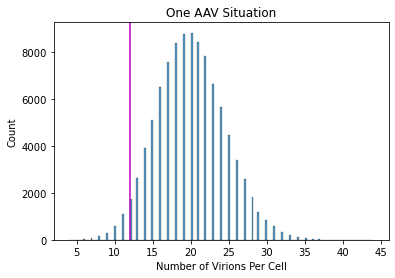

In [4]:
sns.histplot(virions_A)
plt.axvline(detect_limit_A,c="m")
plt.xlabel("Number of Virions Per Cell")
plt.title("One AAV Situation")
print(f"Percentage of cells with detected virus = {np.count_nonzero(virions_A>=detect_limit_A)/n_cells*100}","%")

At this detection limit almost all our cells (~98%)  will be said to express the AAV.

## Two virus situation:

First, I am defining a function to run the same thing as above but with two viruses now... 

In [3]:
def dual_infection(n_cells,lam_A,lam_B,detect_limit_A,detect_limit_B):
    # generate the number of virions per cell for each virus
    virions_A = np.random.poisson(lam=lam_A, size=n_cells)
    virions_B = np.random.poisson(lam=lam_B, size=n_cells)

    #observe your cells: 
    results = np.zeros(n_cells)
    results[(virions_A >= detect_limit_A) & (virions_B >= detect_limit_B)] = 3
    results[(virions_A >= detect_limit_A) & (virions_B < detect_limit_B)] = 2
    results[(virions_A < detect_limit_A) & (virions_B >= detect_limit_B)] = 1

    return results, virions_A, virions_B

Let's assume that the cell doesn't care which of the two AAVs it receives, however, the total number of viral particples that can enter a cell does not change, neither does the detection limit of your method:

In [18]:
# set the number of cells to simulate
n_cells = 100000

# set the lambda values for each virus 
#Note that I have halved this to (roughly) make sure that the overall number of virions per cell is the same as in the one virus situation.
#I have also created the function such that the rate parameter - lambda - and the detection limit (below) could be different for different viruses, as this is likely to also influence results of real biological experiments (here I keep it identical).
lam_A = 10
lam_B = 10

# assume the detection limits are unchanged and that they are the same for both viruses (clearly that may not always be true): 
detect_limit_A = 12
detect_limit_B = 12


results, virions_A, virions_B =dual_infection(n_cells,lam_A,lam_B,detect_limit_A,detect_limit_B)


#report the percentage expressing both:
perceboth=np.count_nonzero(results==3)/np.count_nonzero(results)*100

#report the percentage expressing only one or the other:
perconeorother=(np.count_nonzero(results==2)+np.count_nonzero(results==1))/np.count_nonzero(results)*100

#report the percentage of cells infected:
infected=np.count_nonzero(results)/n_cells*100

## Result 1: Anticipate lower viral expression if you are at lambda-max

Percentage of cells with detected virus = 51.425 %


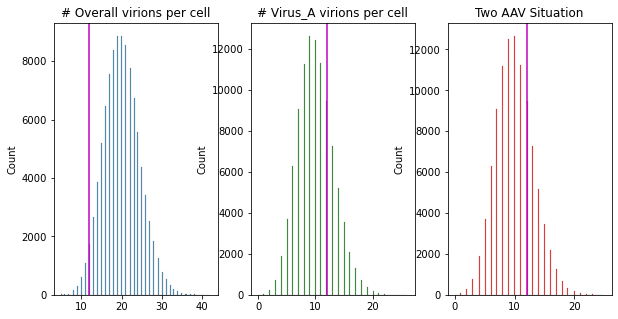

In [19]:
fig,ax=plt.subplots(1,3,figsize=(10,5))
sns.histplot(virions_A+virions_B,ax=ax[0])
ax[0].axvline(detect_limit_A,c="m")
ax[0].set_title("# Overall virions per cell")
sns.histplot(virions_A,ax=ax[1],color='green')
ax[1].axvline(detect_limit_A,c="m")
ax[1].set_title("# Virus_A virions per cell")
sns.histplot(virions_B,ax=ax[2],color='red')
ax[2].axvline(detect_limit_B,c="m")
ax[2].set_title("# Virus_B virions per cell")
plt.title("Two AAV Situation")
print(f"Percentage of cells with detected virus = {infected}","%")

An obvious but probably often overlooked problem with dual AAV transduction is that if lambda (i.e. the modal number of AAV copies per cell) is at its biological limit in the single AAV infection condition, then adding a second AAV will reduce your expression by ~50%, __even if double the dose or titre__.

This is simply a consequence of the cells are not being able to take on more virus per individual cell (and assuming that the cells don't care which AAV they take up (i.e. p(infect-AAV_A) = p(infect-AAV_B))). 

So, if you are saturating the number of virions that a single cell can be infected wth, a researcher should expect lower expression of the viruses when co-transducing multiple AAVs and increasing the dose or titre will not help (although you may get more overall cells).

## Probability of finding co-transduced cells has a non-linear relationship to your detection limit

In [20]:
print(f"Percentage of cells with both AAVs detected = {perceboth}","%")
print(f"Percentage of cells with only on or other of the AAVs detected = {perconeorother}","%")

Percentage of cells with both AAVs detected = 17.808458920758387 %
Percentage of cells with only on or other of the AAVs detected = 82.19154107924162 %


With the parameters used above, due to the relationship between the values I have chosen for the detecion limit and lambda, I can only detect both viruses in fewer than 20% of the cells that are co-transduced.

I'll run the function above in a loop to see what the impact of the detection limit is on co-transduced cells (keeping lambda fixed at 20):

In [21]:
# set the number of cells to simulate
n_cells = 100000

# set the lambda values for each virus 
#Note that I have halved this to (roughly) make sure that the overall number of virions per cell is the same as in the one virus situation: 
lam_A = 10
lam_B = 10

data=[]
ratio=[]
for detect_limit in range(1,21):
    results,v_A, v_B =dual_infection(n_cells,lam_A,lam_B,detect_limit,detect_limit)
    perceboth=np.count_nonzero(results==3)/np.count_nonzero(results)*100
    data.append(perceboth)
    ratio.append(detect_limit/(lam_A+lam_B))

Text(0.5, 1.0, 'Detection of dual transduced cells is not a linear function of detection limit')

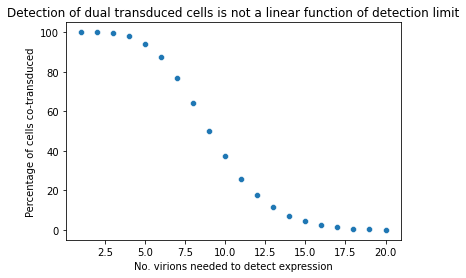

In [22]:
sns.scatterplot(x=range(1,21),y=data)
plt.xlabel("No. virions needed to detect expression")
plt.ylabel("Percentage of cells co-transduced")
plt.title("Detection of dual transduced cells is not a linear function of detection limit")

The relationship between the probability of finding co-transduced cells and the detection limit is a sigmoidal curve. Here I fixed lambda, but this relationship is a general property of the detection-limit:lambda ratio and I express it as so in the figure below:

Text(0.5, 1.0, 'Detection of dual transduced cells is not a linear function of detection limit')

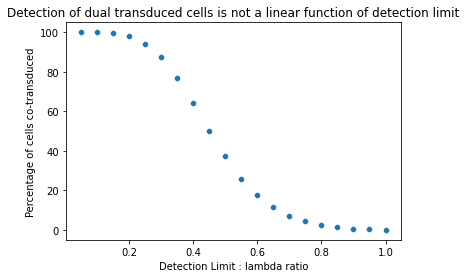

In [23]:
sns.scatterplot(x=ratio,y=data)
plt.xlabel("Detection Limit : lambda ratio")
plt.ylabel("Percentage of cells co-transduced")
plt.title("Detection of dual transduced cells is not a linear function of detection limit")

The probability of finding co-transduced cells is near 100% (i.e. if you find one AAV expressed in a cell you will always find the other) when your detection limit (relative to lambda) is very low (i.e. very sensitive detection method). 

This starts to rapidly decline when the detction limit exceeds ~25% of lambda and falls to near no co-transduced cells being discovered when when the detection limit is reaches around 75% of lambda. 

Since we are only examining cells that had some probability of getting infected and this value is drawn from Possion distribution with lamda = 10, cells without both virions are rare (see below).

In [24]:
print("n_cells without any virus_A =",(v_A==0).sum())
print("n_cells without any virus_B =",(v_B==0).sum())
print("n_cells without any virus at all",((v_B+v_A)==0).sum())

n_cells without any virus_A = 8
n_cells without any virus_B = 5
n_cells without any virus at all 0


## Conclusion:

There are three reasonably obvious yet somehow interesting and probably frequently overlooked things to come from looking at the probability of two count events in a joint poisson distribution being viewed through some limitation in their detection.

First, how difficult it is to observe co-transduction from multiple AAVs (or any virus for that matter) depends on the sensitivity of your detection method and its relation to how many copies of a virus can transduce the cells you are working with (detection limit:lambda ratio).

Second, the proportion of detectable co-expression of two viruses is not a linear function of this detection limit:lambda ratio, so researchers operating at even realtively similar methodological sensitivities to detect expression may report quite different levels of co-transduction if they are on a particularly steep part of the sigmoid curve (and visa versa on a shallow part).

Finally, assuming lambda has some finite limit in a given experimental context (which presumeably it must). If the data that we tend to look at routinely with single viruses is already well saturating the cells with virus, then you should expect to see only 50% of expression levels when using two viruses and 30% when using 3 viruses, etc, and doubling, tripling the dosages won't affect this (though you may recruit more cells). The potential titre/dose insensitive reduction in expression should be considered when combining multiple AAVs if you are comparing experimental responses originally obsevered with single AAVs.